In [13]:
import pandas as pd
import numpy as np
import io
import warnings
warnings.filterwarnings(action='ignore')


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [14]:
df=pd.read_csv("../00_Data/Integrated_data/Fully_integrated_data.csv",encoding="utf-8")
df.head()


,Unnamed: 0,Date,Total Traffic Volume,Base Interest Rate,Exchange Rate,Gross Domestic Product (GDP),Economic Growth Rate (Real GDP Growth Rate),Export price,Export growth rate,Import price,Import growth rate,Nationwide Consumer Price Index,Regular Unleaded Gasoline,Diesel Fuel for Automobiles,number of car ownership
0,0,2011-01-01,5466446.0,2.75,1121.500000,328096.0,5.4,4.446537e+07,44.700000,4.198132e+07,13.600000,90.448000,1814.57,1611.14,18409608.0
1,1,2011-01-02,5059821.0,2.75,1121.732258,328096.0,5.4,4.426952e+07,43.775943,4.179913e+07,13.521635,90.397806,1815.24,1611.79,18398782.0
2,2,2011-01-03,5631394.0,2.75,1121.964516,328096.0,5.4,4.407367e+07,42.851885,4.161694e+07,13.443269,90.347613,1816.15,1612.85,18387956.0
3,3,2011-01-04,5584995.0,2.75,1122.196774,328096.0,5.4,4.387783e+07,41.927828,4.143475e+07,13.364904,90.297419,1817.48,1614.02,18377130.0
4,4,2011-01-05,5742955.0,2.75,1122.429032,328096.0,5.4,4.368198e+07,41.003771,4.125256e+07,13.286539,90.247226,1818.53,1615.00,18366304.0


In [15]:
df.drop(columns='Unnamed: 0', inplace=True)
df

,Date,Total Traffic Volume,Base Interest Rate,Exchange Rate,Gross Domestic Product (GDP),Economic Growth Rate (Real GDP Growth Rate),Export price,Export growth rate,Import price,Import growth rate,Nationwide Consumer Price Index,Regular Unleaded Gasoline,Diesel Fuel for Automobiles,number of car ownership
0,2011-01-01,5466446.0,2.75,1121.500000,328096.0,5.4,4.446537e+07,44.700000,4.198132e+07,13.600000,90.448000,1814.57,1611.14,18409608.0
1,2011-01-02,5059821.0,2.75,1121.732258,328096.0,5.4,4.426952e+07,43.775943,4.179913e+07,13.521635,90.397806,1815.24,1611.79,18398782.0
2,2011-01-03,5631394.0,2.75,1121.964516,328096.0,5.4,4.407367e+07,42.851885,4.161694e+07,13.443269,90.347613,1816.15,1612.85,18387956.0
3,2011-01-04,5584995.0,2.75,1122.196774,328096.0,5.4,4.387783e+07,41.927828,4.143475e+07,13.364904,90.297419,1817.48,1614.02,18377130.0
4,2011-01-05,5742955.0,2.75,1122.429032,328096.0,5.4,4.368198e+07,41.003771,4.125256e+07,13.286539,90.247226,1818.53,1615.00,18366304.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2023-12-27,10276694.0,3.50,1324.077419,580296.0,1.4,5.717900e+07,5.450600,5.290244e+07,-11.037139,109.631118,1583.53,1501.33,25949201.0
4742,2023-12-28,10408581.0,3.50,1325.580645,580296.0,1.4,5.724470e+07,5.375500,5.293918e+07,-11.014283,109.631118,1582.63,1500.25,25949201.0
4743,2023-12-29,11018411.0,3.50,1327.083871,580296.0,1.4,5.731039e+07,5.300400,5.297591e+07,-10.991426,109.631118,1581.89,1499.03,25949201.0
4744,2023-12-30,8958402.0,3.50,1328.587097,580296.0,1.4,5.737609e+07,5.225300,5.301265e+07,-10.968570,109.631118,1581.22,1498.23,25949201.0


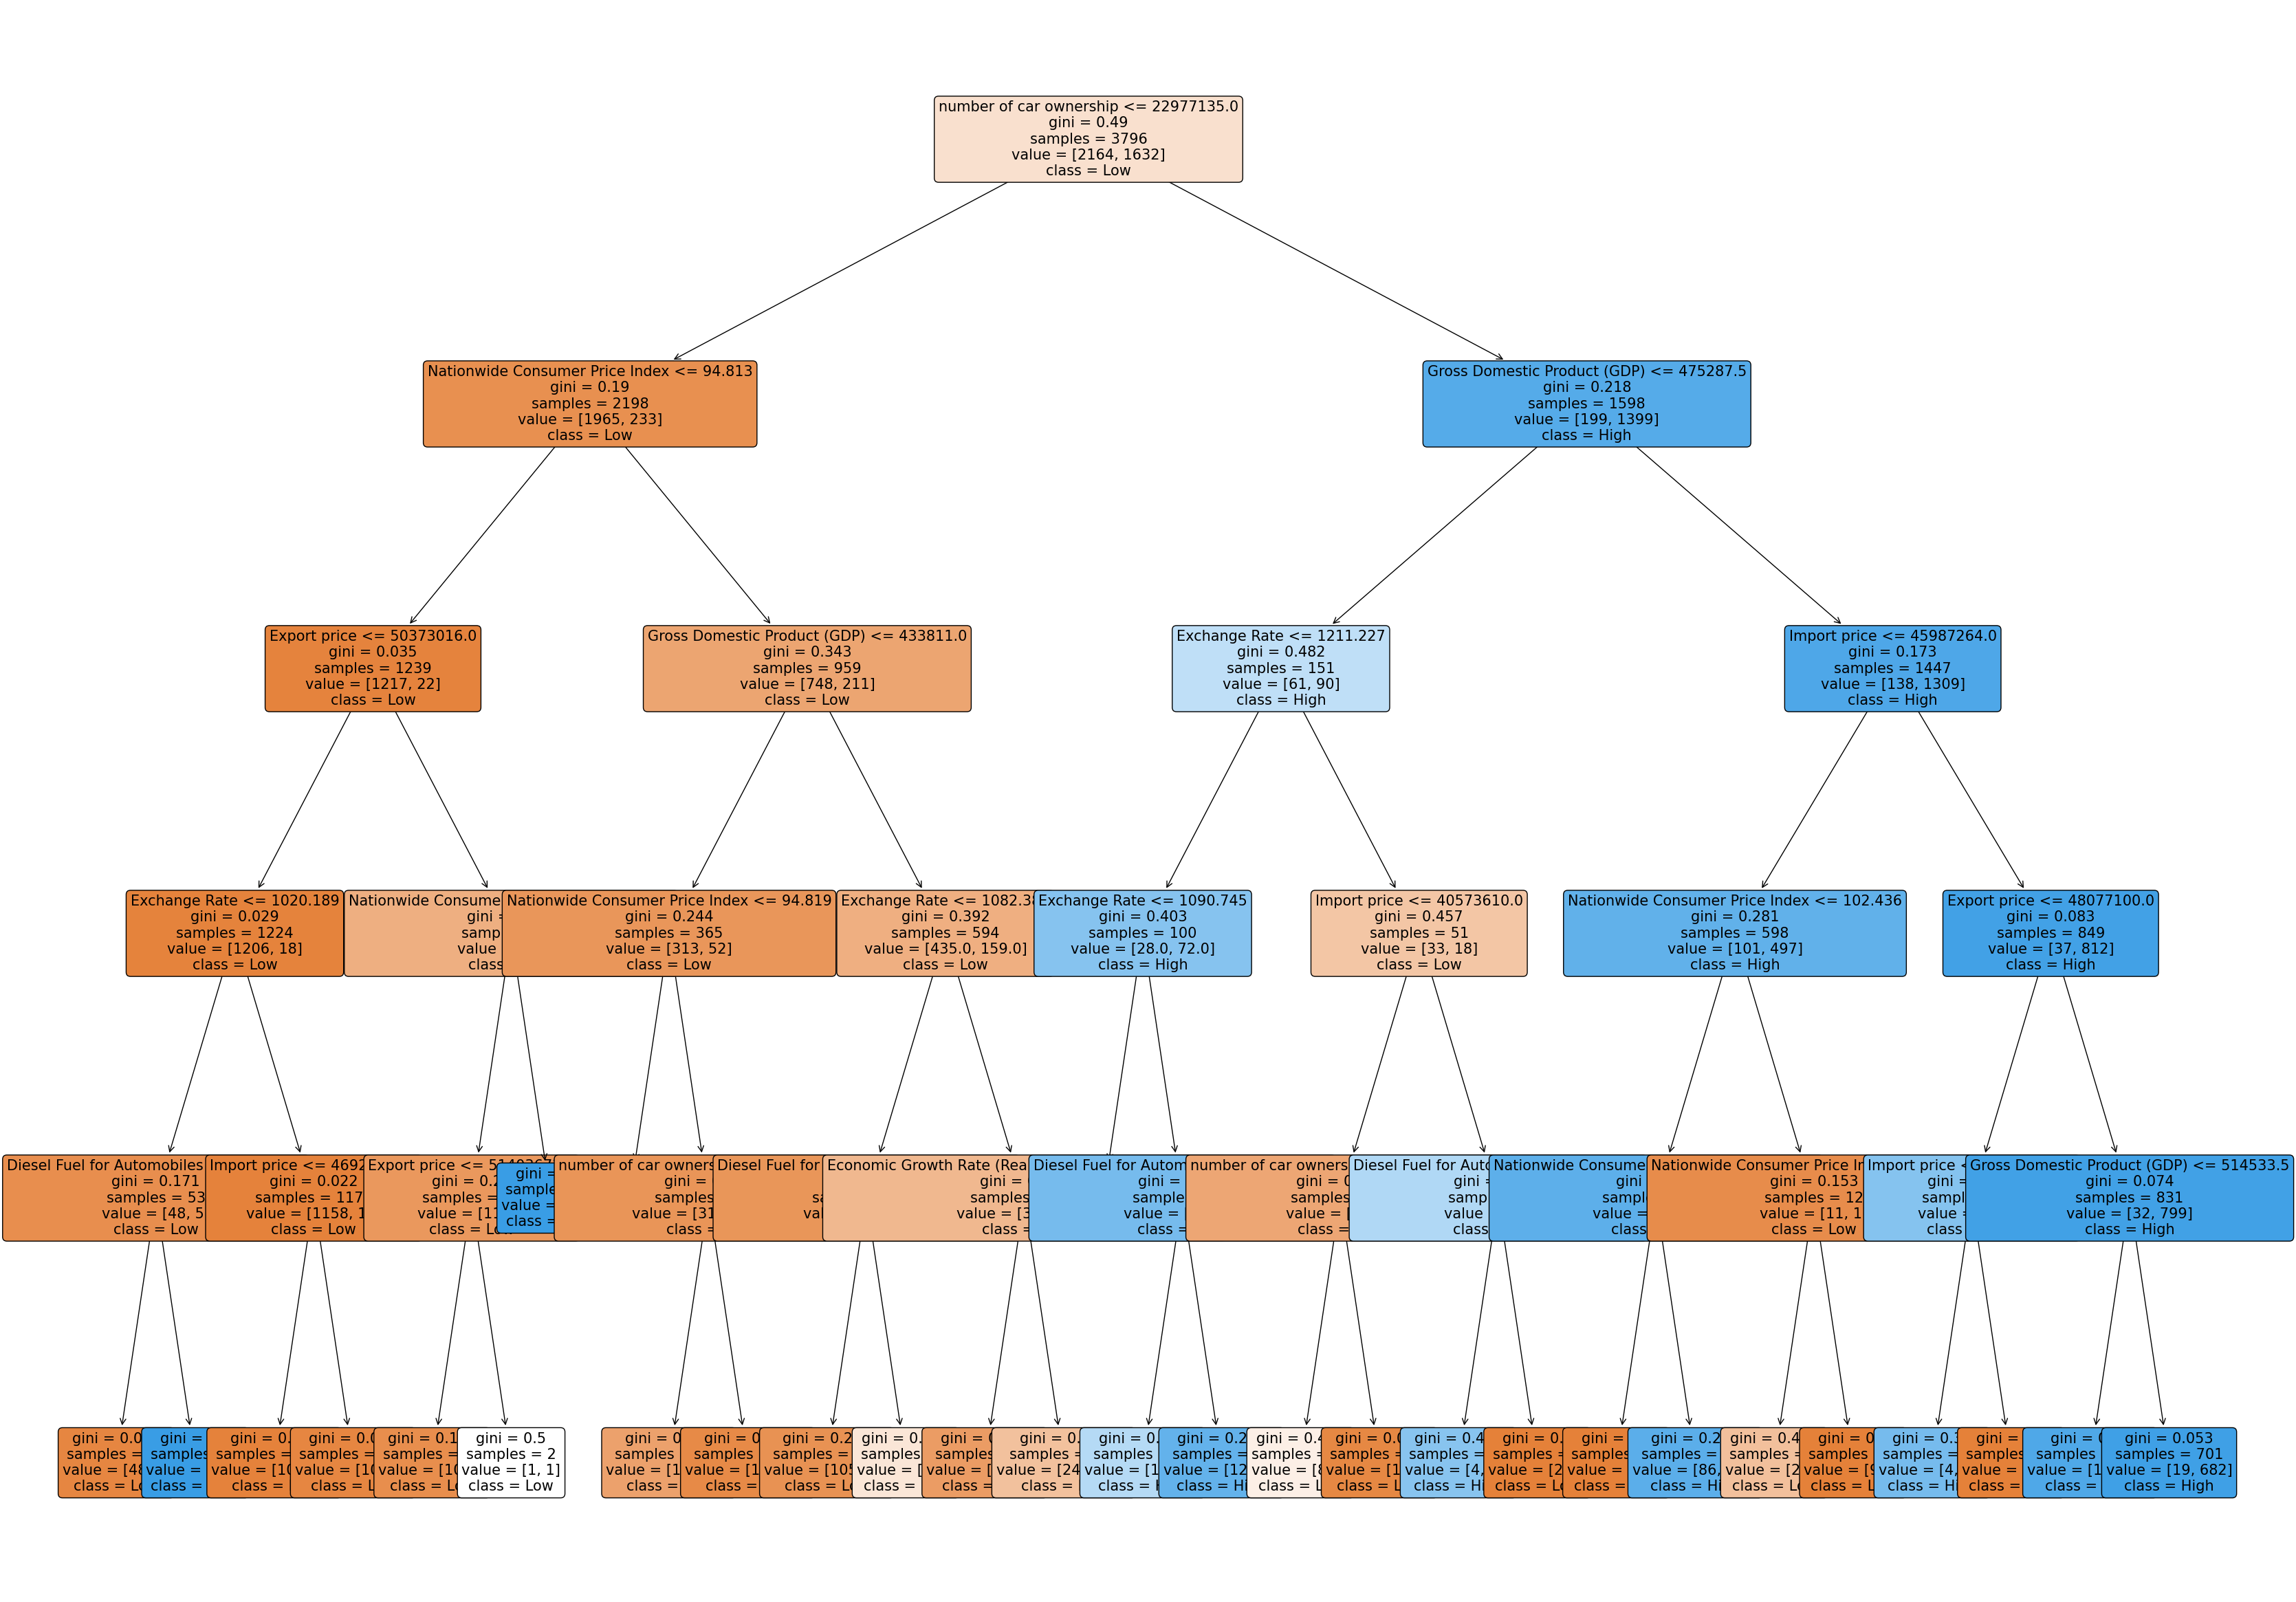

Accuracy: 0.8768421052631579


In [16]:
# Run only once
df.drop(columns='Date',inplace=True)

# Drop columns with low correlation
correlation_matrix = df.corr()
target_column = 'Total Traffic Volume'  # Assuming we are predicting Traffic rate
correlation_threshold = 0.1

# Get columns with correlation higher than the threshold
high_corr_columns = correlation_matrix[abs(correlation_matrix[target_column]) > correlation_threshold].index
df_high_corr = df[high_corr_columns]

# Check for missing values in the dataframe
missing_values = df_high_corr.isnull().sum()

# Drop rows with missing values
df_high_corr_clean = df_high_corr.dropna()

# Binarize the target for simplicity (you can adjust this as per your requirement)
df_high_corr_clean['Total Traffic Volume'] = pd.cut(df_high_corr_clean['Total Traffic Volume'], bins=2, labels=[0, 1])

# Prepare the dataset for the decision tree classifier
X_class = df_high_corr_clean.drop(columns=['Total Traffic Volume'])
y_class = df_high_corr_clean['Total Traffic Volume']

# Split the dataset
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Train the decision tree classifier with max depth of 5
decision_tree_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
decision_tree_classifier.fit(X_train_class, y_train_class)

# Predict and evaluate
y_pred_class = decision_tree_classifier.predict(X_test_class)
accuracy = accuracy_score(y_test_class, y_pred_class)

# Visualize the decision tree classifier with larger nodes
plt.figure(figsize=(40, 30))
plot_tree(decision_tree_classifier, feature_names=X_class.columns, filled=True, rounded=True, class_names=['Low', 'High'], fontsize=15)
plt.show()

print(f'Accuracy: {accuracy}')